In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 2. Dataset Exploration:


In [8]:
df = pd.read_csv('/content/mhealth_raw_data.csv')
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [9]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [10]:
df.drop(['subject'], axis=1, inplace=True)
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0


In [11]:
df['Activity'].unique()

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12,  5])

In [12]:
df['Activity'].value_counts()

Activity
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64

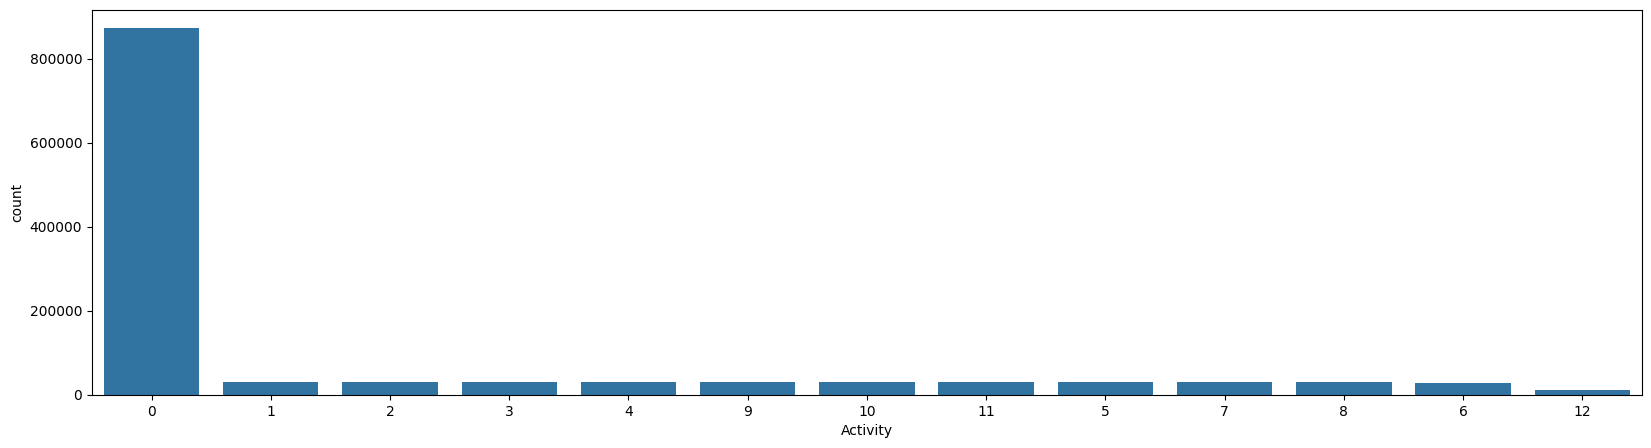

In [13]:
plt.figure(figsize=(20, 5))
sns.countplot(x =df['Activity'],data = df,order=df["Activity"].value_counts().index )
plt.show()

In [14]:
df = df.sample(n=104000)

In [15]:
# Define the number of samples per group
samples_per_group = 8000

# Group by 'activity' and sample from each group
df = df.groupby('Activity').apply(lambda x: x.sample(n=samples_per_group, random_state=42) if len(x) >= samples_per_group else x.sample(n=samples_per_group, replace=True, random_state=42)).reset_index(drop=True)


In [16]:
len(df)

104000

In [17]:
# Print the sample count per activity to verify
print(df['Activity'].value_counts())


Activity
0     8000
1     8000
2     8000
3     8000
4     8000
5     8000
6     8000
7     8000
8     8000
9     8000
10    8000
11    8000
12    8000
Name: count, dtype: int64


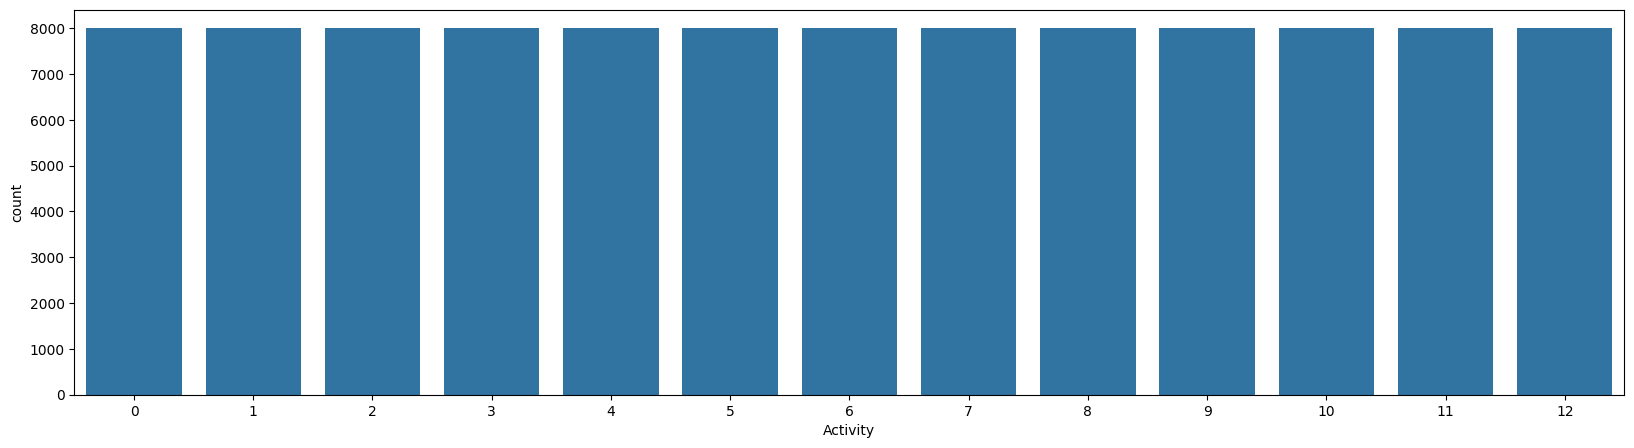

In [18]:
plt.figure(figsize=(20, 5))
sns.countplot(x =df['Activity'],data = df,order=df["Activity"].value_counts().index )
plt.show()

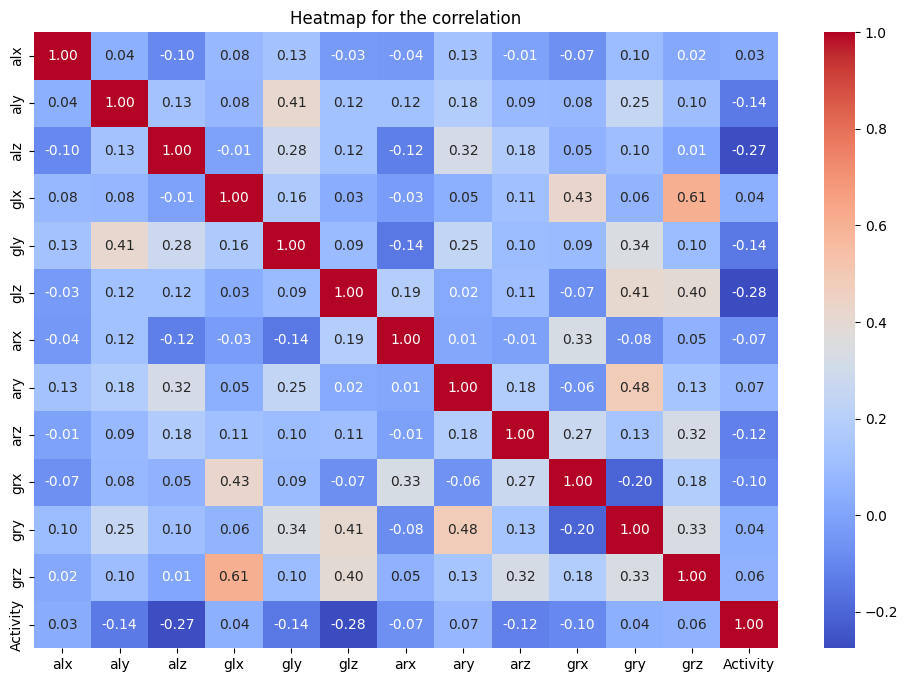

In [19]:
numeric_columns = df.select_dtypes(include=['int', 'float'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap for the correlation')
plt.show()

In [20]:
'''
df.to_csv('/content/mhealth_raw_data.csv', index=False)
from google.colab import files
files.download('/content/mhealth_raw_data.csv')
'''

"\ndf.to_csv('/content/mhealth_raw_data.csv', index=False)\nfrom google.colab import files\nfiles.download('/content/mhealth_raw_data.csv')\n"

In [23]:
##select all rows and all columns except the last one.
X = df.iloc[:,:-1]

##select all rows, but only the last column.
y = df.iloc[:,-1]

# KNN

In [25]:
#split the data into train and test sets (80,20):
#Shuffle=True, meaning the data will be shuffled before splitting.
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True, random_state=0)

# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
from sklearn.metrics import classification_report

# Predict on test data
y_pred_knn = knn.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Accuracy: 0.9630288461538462


In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 1}
Best score: 0.9704326923076924


In [29]:
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

Accuracy: 0.9630288461538462
Precision: 0.9637104034615375
Recall: 0.9630288461538462
F1 Score: 0.9598915610476841


In [30]:
# Cross Validetion

cv_knn = cross_val_score(knn, X_train, y_train, scoring='accuracy')
print(f"Cross-validation scores :  {cv_knn} , Score : {cv_knn.mean()} , STD Scores {cv_knn.std()} ")

Cross-validation scores :  [0.95913462 0.95721154 0.96135817 0.95799279 0.95913462] , Score : 0.958966346153846 , STD Scores 0.0014003306548980852 


In [31]:
# Mean Squared Error(MSE)

mse_knn = mean_squared_error(y_test , y_pred_knn)
mse_knn

1.5588461538461538

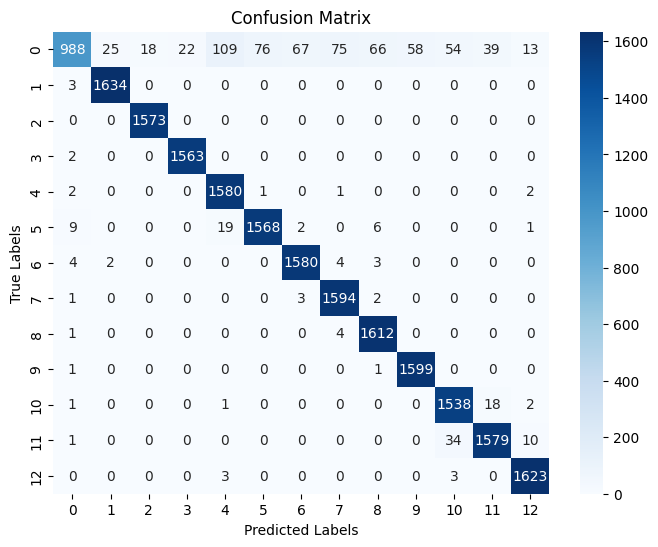

In [32]:
# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Neural  Network



In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd
from sklearn.datasets import make_moons

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=[12]),
    tf.keras.layers.Dense(units=32), tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=64), tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=13, activation="softmax"),
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy", optimizer="adam")
model.summary()
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 13)                8

In [35]:
model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred_nn = model.predict(X_test)

In [36]:
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision = precision_score(y_test, y_pred_nn, average='weighted')
recall = recall_score(y_test, y_pred_nn, average='weighted')
f1 = f1_score(y_test, y_pred_nn, average='weighted')
cm_nn = confusion_matrix(y_test, y_pred_nn)

print("Accuracy:", accuracy_nn)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9580288461538462
Precision: 0.9561377401164647
Recall: 0.9580288461538462
F1-score: 0.9562861965238101


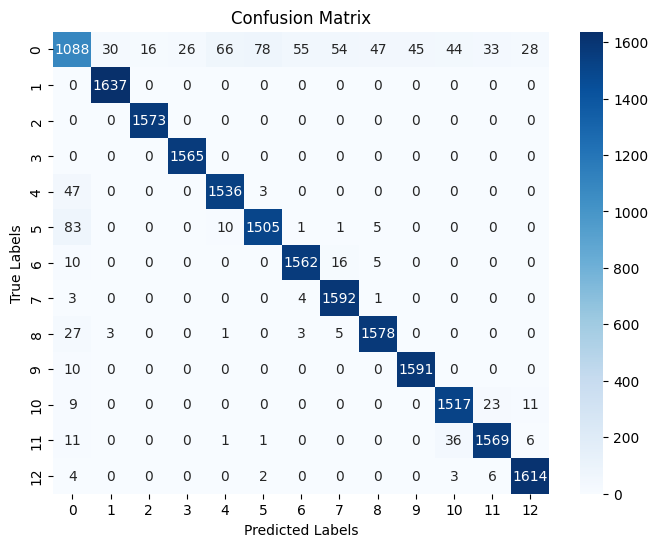

In [37]:
# Confusion matrix

cm_NN = confusion_matrix(y_test, y_pred_nn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_NN, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 101, shuffle=True)


# Hyper Tuning

param_grid_logistic  = { 'C': [0.001, 0.01, 0.1, 1, 10, 100] , 'penalty': ['l1', 'l2']  }

logistic = LogisticRegression()

# Perform grid search
grid_search_logistic = GridSearchCV(logistic, param_grid_logistic, cv=5, scoring='accuracy')  # You can adjust cv and scoring as needed
grid_search_logistic.fit(X_train, y_train)

# Get the best hyperparameters
best_params_logistic = grid_search_logistic.best_params_
print("Best Hyperparameters:", best_params_logistic)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
logistic = LogisticRegression(**best_params_logistic)
logistic.fit(X_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [40]:
y_pred_log=logistic.predict(X_test)
y_pred_log

array([ 3,  3,  3, ..., 11,  6, 10])

In [41]:
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log, average='weighted')
recall_log = recall_score(y_test, y_pred_log, average='weighted')
f1_log = f1_score(y_test, y_pred_log, average='weighted')

In [42]:
print("accuracy: ",accuracy_log)
print("precision: ",precision_log)
print("recall: ",recall_log)
print("f1: ",f1_log)

accuracy:  0.5441826923076923
precision:  0.5225660691247793
recall:  0.5441826923076923
f1:  0.5263645843649726


In [43]:
# Cross Validetion

cv_logistic = cross_val_score(logistic, X_train, y_train, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

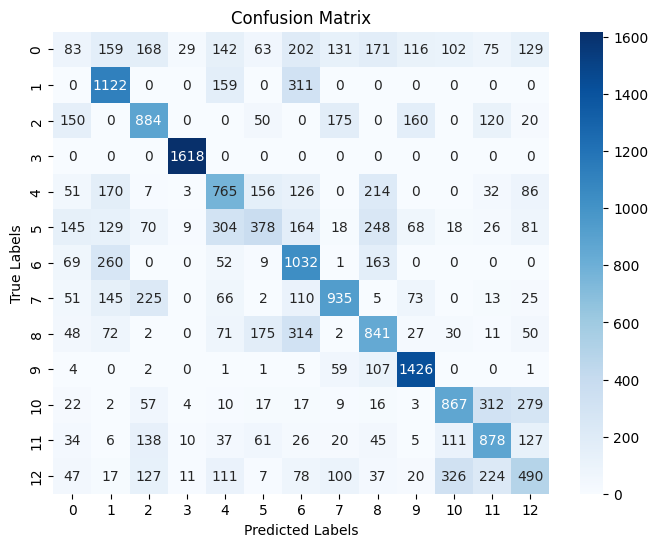

In [44]:
# Confusion matrix

cm_logistic = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Linear Regression

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, shuffle=True)

In [46]:
# Training the model

lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [47]:
# Predict
y_pred_lin = lin.predict(X_test)

# Cross Validetion
cv_lin = cross_val_score(lin, X_train, y_train, scoring='accuracy')
print(f"Cross-validation scores :  {cv_lin} , Score : {cv_lin.mean()} , STD Scores {cv_lin.std()} ")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
  

Cross-validation scores :  [nan nan nan nan nan] , Score : nan , STD Scores nan 


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 95, in _check_targets
  

In [48]:
mse_lin = mean_squared_error(y_test , y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
print(mse_lin)
print(rmse_lin)

10.604990582200259
3.2565304516003315


#SVM

In [49]:
import numpy as np
import pandas as pd
import itertools

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [50]:
#split the data into train and test sets (80,20):
#Shuffle=True, meaning the data will be shuffled before splitting.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True, random_state=0)

In [51]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# Create SVM classifier with RBF kernel
svm_model = SVC(C=20, kernel='rbf', gamma=0.1)

# Train the model
svm_model.fit(X_train, y_train)

SVC(C=20, gamma=0.1)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict the response for the test dataset
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

Accuracy: 0.9662019230769231


In [55]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("Accuracy: ", accuracy_svm)
print("Precision: ", precision_svm)
print("Recall: ", recall_svm)
print("F1 Score: ", f1_svm)

Accuracy:  0.9662019230769231
Precision:  0.9657226611723928
Recall:  0.9662019230769231
F1 Score:  0.9638725159221291


In [57]:
# Cross Validetion

cv_svm = cross_val_score(svm_model, X_train, y_train, scoring='accuracy')
print(f"Cross-validation scores :  {cv_svm} , Score : {cv_svm.mean()} , STD Scores {cv_svm.std()} ")

Cross-validation scores :  [0.96340144 0.96370192 0.96532452 0.96153846 0.96268029] , Score : 0.9633293269230769 , STD Scores 0.0012452526344162848 


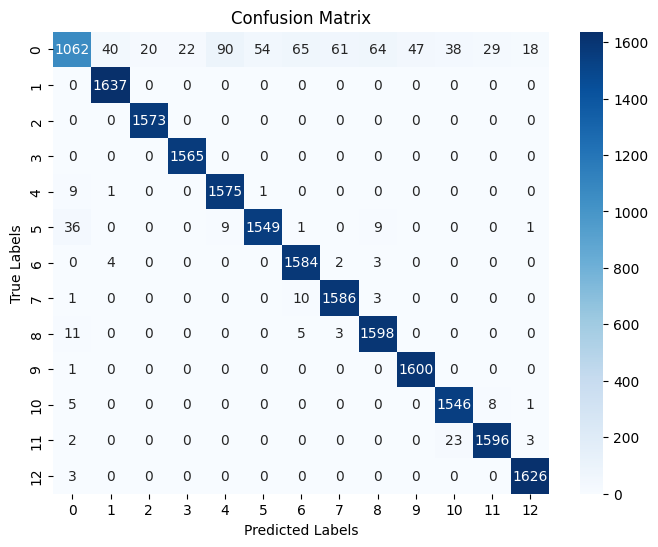

In [58]:
# Confusion matrix

cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Comparison

In [59]:
print("Accuracy of KNN:", accuracy_knn)
print("Accuracy: of SVM", accuracy_svm)
print("Accuracy of NN", accuracy_nn)
print("Accuracy: of Logistic Regression", accuracy_log)

#SVM is the highest accuracy

Accuracy: 0.9630288461538462
Accuracy:  0.9662019230769231
Accuracy: 0.9580288461538462
Accuracy:  0.5441826923076923
